In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [2]:
train.shape

(321437, 13)

In [3]:
# Lets combine the Dataset

combined = pd.concat([train, test], ignore_index = True)

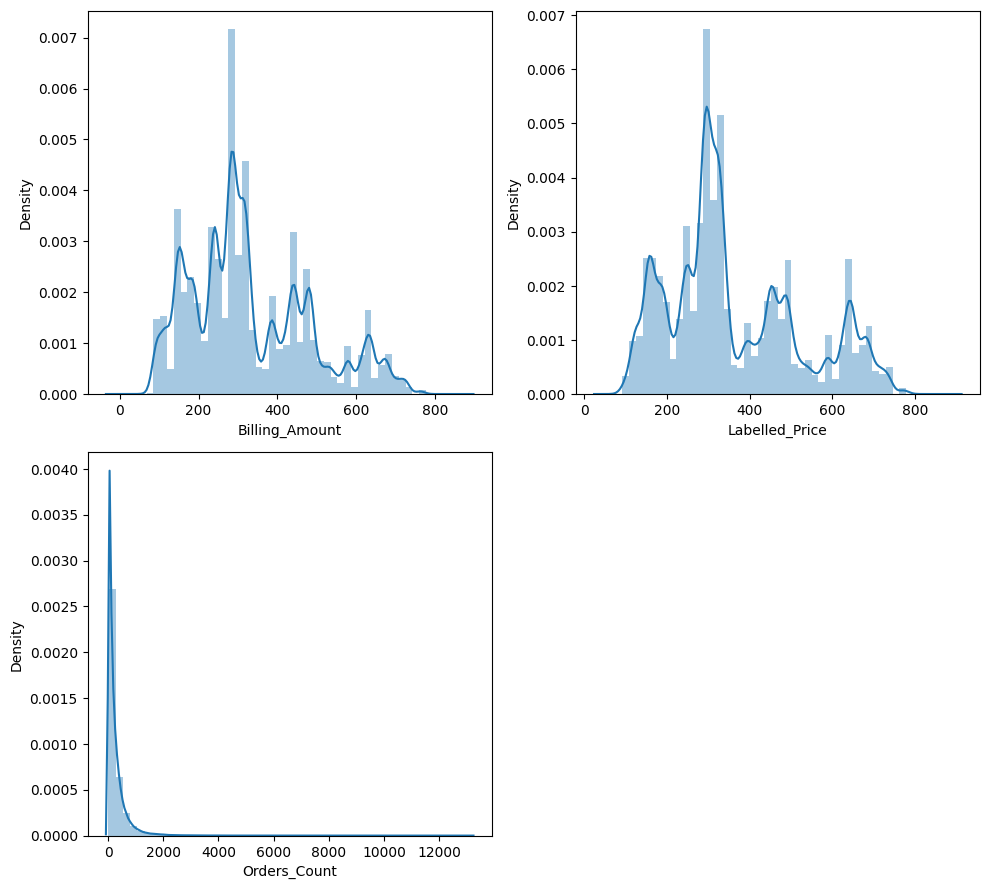

In [5]:
plt.figure(figsize = [10,9])
num_cols = ['Billing_Amount', 'Labelled_Price', 'Orders_Count']

nrows = 2
ncols = 2
iterator = 1

for i in num_cols:
  plt.subplot(nrows, ncols, iterator)
  sns.distplot(combined.loc[:, i])
  iterator += 1

plt.tight_layout()
plt.show()

In [7]:
import scipy.stats as stats

In [9]:
combined.isnull().sum()

Period_No                                0
Facility_No                              0
Facility_Category                        0
City_Zip_Code                            0
Operational_Region_Coverage_Area         0
Billing_Amount                           0
Labelled_Price                           0
Custom_Promoted                          0
Promoted                                 0
Search_Promotions                        0
Orders_Count                        118070
Course                                   0
Flavour_Profile                          0
dtype: int64

In [14]:
pvalues = []
for i in num_cols:
    teststats, pvalue = stats.ttest_ind(train.loc[:, i], train.Orders_Count)
    pvalues.append(pvalue)

In [15]:
pd.DataFrame(pvalues, index = num_cols, columns = ["Pvalue'])

# All features are Important
                                                

,0
Billing_Amount,0.0
Labelled_Price,0.0
Orders_Count,1.0


In [16]:
cat_cols=['Period_No', 'Custom_Promoted', 'Promoted', 'Search_Promotions', 'Facility_Category']

import statsmodels.formula.api as sfa

from statsmodels.stats.anova import anova_lm

model = sfa.ols("Orders_Count~Period_No+Custom_Promoted+Promoted+Search_Promotions+Facility_Category",
        data = combined).fit()

print(anova_lm(model))

                         df        sum_sq       mean_sq             F  \
Facility_Category       2.0  3.853415e+08  1.926708e+08   1521.332329   
Period_No               1.0  4.469243e+07  4.469243e+07    352.892363   
Custom_Promoted         1.0  4.108911e+09  4.108911e+09  32444.050565   
Promoted                1.0  1.903102e+09  1.903102e+09  15026.930995   
Search_Promotions       1.0  1.947709e+08  1.947709e+08   1537.915236   
Residual           321430.0  4.070785e+10  1.266461e+05           NaN   

                         PR(>F)  
Facility_Category  0.000000e+00  
Period_No          1.095383e-78  
Custom_Promoted    0.000000e+00  
Promoted           0.000000e+00  
Search_Promotions  0.000000e+00  
Residual                    NaN  


In [17]:
combined.head()

,Period_No,Facility_No,Facility_Category,City_Zip_Code,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,Orders_Count,Course,Flavour_Profile
0,1,324,c1,977,169,192.955562,267.971749,0,0,0,123.0,Finger Foods,Asian Fusion
1,1,10,c3,0,62,193.384864,203.836706,0,0,0,55.0,Broths & Stews,Asian Fusion
2,1,99,c3,0,167,384.988183,388.957411,0,0,0,204.0,Smoothies & Juices,Western
3,1,95,c3,17,2,255.251864,263.923874,0,0,0,257.0,Grain Bowls,South Asian
4,1,128,c3,17,18,319.949514,326.128813,0,0,0,14.0,Appetizers,Asian Fusion


In [26]:
# Period No has entries till 100 resonating wth Order Count
combined.groupby("Period_No")["Orders_Count"].describe()[:100]

,count,mean,std,min,25%,50%,75%,max
Period_No,,,,,,,,
1,3250.0,205.896000,253.210473,13.0,53.0,122.0,269.0,2822.0
2,3290.0,242.832219,289.594577,13.0,55.0,148.0,312.0,2715.0
3,3286.0,229.356665,277.997060,13.0,54.0,135.0,296.0,3172.0
4,3212.0,228.412827,277.741486,13.0,53.0,134.0,310.0,2848.0
5,3240.0,237.643210,294.750044,13.0,53.0,123.0,323.0,3012.0
...,...,...,...,...,...,...,...,...
97,3109.0,299.257639,377.704739,13.0,55.0,163.0,393.0,6576.0
98,3107.0,416.708722,768.388798,13.0,67.0,161.0,405.0,9532.0
99,3041.0,264.857941,335.030524,13.0,53.0,148.0,352.0,3753.0


In [32]:
#@combined.groupby("Facility_No")["Orders_Count"].describe()

# Order Count Facility Wise

combined["OC_FW"] = combined.groupby("Facility_No")["Orders_Count"].transform('count')
combined["AOC_FW"] = combined.groupby("Facility_No")["Orders_Count"].transform('mean')
combined["MOC_FW"] = combined.groupby("Facility_No")["Orders_Count"].transform('median')
combined["MinOC_FW"] = combined.groupby("Facility_No")["Orders_Count"].transform('min')
combined["MaxAOC_FW"] = combined.groupby("Facility_No")["Orders_Count"].transform('max')
combined["SDAOC_FW"] = combined.groupby("Facility_No")["Orders_Count"].transform('std')

In [37]:
combined["Magic1"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform('count')
combined["Magic2"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform('mean')
combined["Magic3"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform('median')
combined["Magic4"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform('min')
combined["Magic5"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform('max')
combined["Magic6"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform('std')

In [40]:
combined.drop(["Facility_No", "City_Zip_Code"], axis = 1, inplace = True)

In [43]:
#combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].describe()

combined["Magic7"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform('count')
combined["Magic8"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform('mean')
combined["Magic9"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform('median')
combined["Magic10"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform('min')
combined["Magic11"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform('max')
combined["Magic12"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform('std')

In [62]:
combined.head()

,Period_No,Facility_Category,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,Orders_Count,Course,Flavour_Profile,...,Magic4,Magic5,Magic6,Magic7,Magic8,Magic9,Magic10,Magic11,Magic12,area
0,1,c1,192.955562,267.971749,0,0,0,123.0,Finger Foods,Asian Fusion,...,13.0,9532.0,289.687066,18103,313.646523,148.0,13.0,10544.0,473.337118,Others
1,1,c3,193.384864,203.836706,0,0,0,55.0,Broths & Stews,Asian Fusion,...,13.0,13150.0,464.342597,36987,222.396247,122.0,13.0,9532.0,329.431315,top5
2,1,c3,384.988183,388.957411,0,0,0,204.0,Smoothies & Juices,Western,...,13.0,13150.0,464.342597,6653,160.297760,94.0,13.0,4009.0,224.186851,Others
3,1,c3,255.251864,263.923874,0,0,0,257.0,Grain Bowls,South Asian,...,13.0,6426.0,263.878412,7575,244.712739,149.0,13.0,4726.0,298.571900,Others
4,1,c3,319.949514,326.128813,0,0,0,14.0,Appetizers,Asian Fusion,...,13.0,6426.0,263.878412,17767,184.067372,107.0,13.0,5334.0,252.308016,Others


In [48]:
combined.Operational_Region_Coverage_Area.value_counts()[:5].index

Index([62, 41, 574, 12, 1], dtype='int64', name='Operational_Region_Coverage_Area')

In [49]:
top5 = [62, 41, 574, 12, 1]

def convert(x):
    if x in top5:
        return("top5")
    else:
        return("Others")

In [50]:
combined["area"] = combined.Operational_Region_Coverage_Area.apply(convert)

In [61]:
combined.drop('Operational_Region_Coverage_Area', axis = 1, inplace = True)

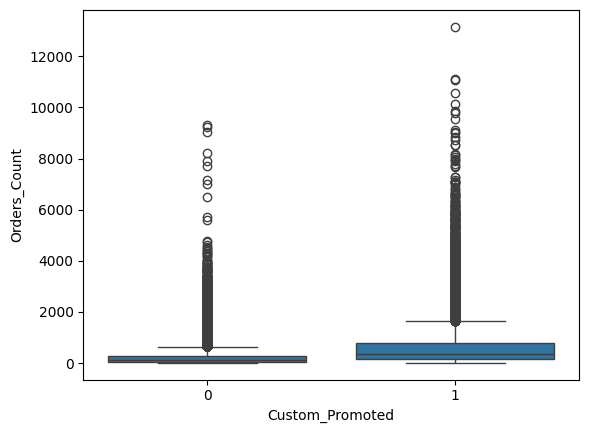

In [63]:
sns.boxplot(x="Custom_Promoted", y = "Orders_Count", data=combined)
plt.show()

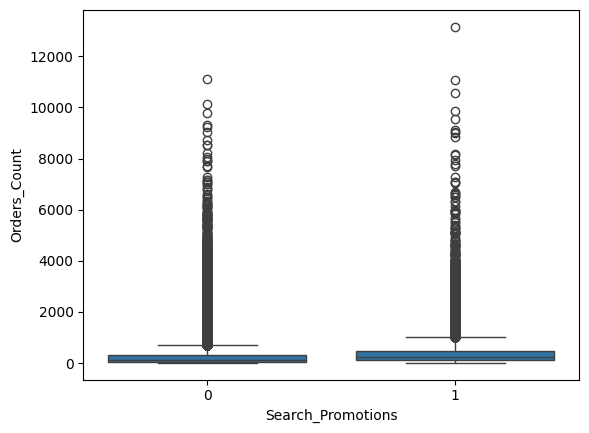

In [65]:
sns.boxplot(x="Search_Promotions", y = "Orders_Count", data=combined)
plt.show()

In [67]:
combined["Promotions"] = combined.Custom_Promoted+combined.Promoted+combined.Search_Promotions

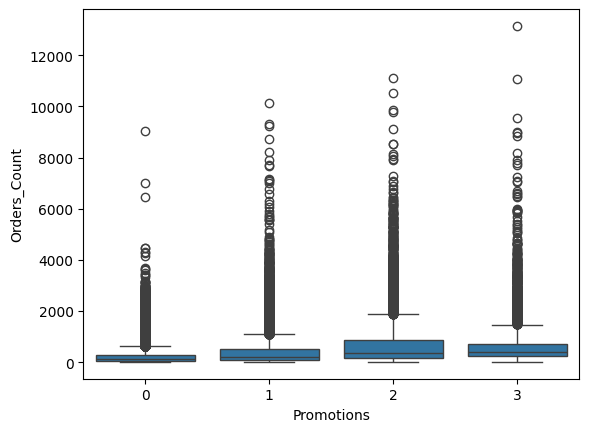

In [68]:
sns.boxplot(x="Promotions", y = "Orders_Count", data=combined)
plt.show()

In [69]:
combined.groupby("Promotions")["Orders_Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Promotions,,,,,,,,
0,267296.0,211.184245,258.580947,13.0,42.0,121.0,283.0,9045.0
1,32589.0,406.138360,540.504742,13.0,94.0,216.0,501.0,10140.0
2,14243.0,686.356315,865.584090,13.0,175.0,377.0,863.0,11110.0
3,7309.0,630.252702,772.219294,13.0,230.0,405.0,728.0,13150.0


In [70]:
combined.drop(['Custom_Promoted', 'Promoted', 'Search_Promotions'], 
              axis =1, inplace = True)

In [71]:
combined.head()

,Period_No,Facility_Category,Billing_Amount,Labelled_Price,Orders_Count,Course,Flavour_Profile,OC_FW,AOC_FW,MOC_FW,...,Magic5,Magic6,Magic7,Magic8,Magic9,Magic10,Magic11,Magic12,area,Promotions
0,1,c1,192.955562,267.971749,123.0,Finger Foods,Asian Fusion,4118,207.096163,134.0,...,9532.0,289.687066,18103,313.646523,148.0,13.0,10544.0,473.337118,Others,0
1,1,c3,193.384864,203.836706,55.0,Broths & Stews,Asian Fusion,4298,257.586087,109.0,...,13150.0,464.342597,36987,222.396247,122.0,13.0,9532.0,329.431315,top5,0
2,1,c3,384.988183,388.957411,204.0,Smoothies & Juices,Western,3635,160.554058,95.0,...,13150.0,464.342597,6653,160.297760,94.0,13.0,4009.0,224.186851,Others,0
3,1,c3,255.251864,263.923874,257.0,Grain Bowls,South Asian,3261,200.477461,108.0,...,6426.0,263.878412,7575,244.712739,149.0,13.0,4726.0,298.571900,Others,0
4,1,c3,319.949514,326.128813,14.0,Appetizers,Asian Fusion,3240,168.157716,95.0,...,6426.0,263.878412,17767,184.067372,107.0,13.0,5334.0,252.308016,Others,0


In [72]:
combined.Course.unique()

array(['Finger Foods', 'Broths & Stews', 'Smoothies & Juices',
       'Grain Bowls', 'Appetizers', 'Grilled Vegetables',
       'Sweets & Treats', 'Wraps & Rolls', 'Noodles & Veggies',
       'Fresh Greens', 'Condiments & Dips', 'Plant-Based Proteins',
       'Stir-Fried Rice', 'Flatbreads'], dtype=object)

In [73]:
combined.Flavour_Profile.unique()

array(['Asian Fusion', 'Western', 'South Asian', 'Mediterranean'],
      dtype=object)

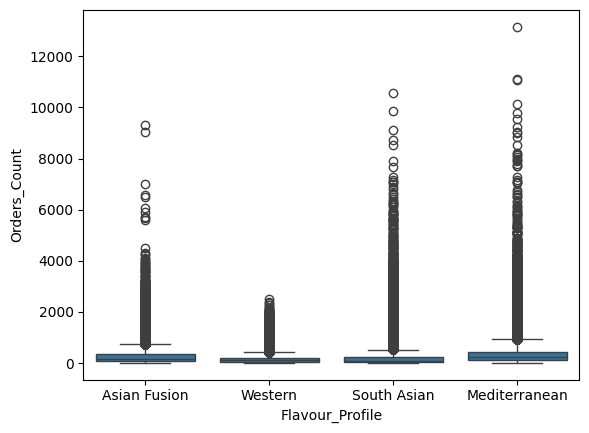

In [74]:
sns.boxplot(x="Flavour_Profile", y = "Orders_Count", data=combined)
plt.show()

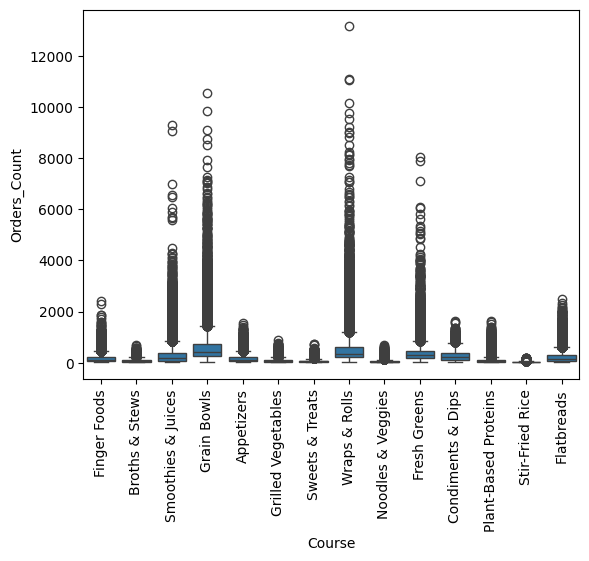

In [76]:
sns.boxplot(x="Course", y = "Orders_Count", data=combined)
plt.xticks(rotation = 90)
plt.show()

In [77]:
combined.groupby("Course")["Orders_Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Course,,,,,,,,
Appetizers,20382.0,155.968992,143.935574,13.0,54.0,109.0,215.0,1554.0
Broths & Stews,8889.0,88.900551,72.350096,13.0,40.0,68.0,121.0,689.0
Condiments & Dips,9350.0,281.830909,222.736124,13.0,122.0,216.0,391.0,1620.0
Finger Foods,20895.0,164.194783,164.063729,13.0,54.0,121.0,216.0,2404.0
Flatbreads,22779.0,233.691382,235.383834,13.0,82.0,161.0,296.0,2499.0
Fresh Greens,22850.0,389.665996,372.423667,13.0,190.0,298.0,459.0,8059.0
Grain Bowls,22937.0,600.332825,614.775419,13.0,257.0,433.0,729.0,10544.0
Grilled Vegetables,10121.0,85.583638,80.312274,13.0,28.0,67.0,109.0,879.0
Noodles & Veggies,18601.0,58.128111,53.681616,13.0,26.0,41.0,69.0,690.0


Index(['Smoothies & Juices', 'Grain Bowls', 'Wraps & Rolls', 'Flatbreads',
       'Appetizers'],
      dtype='object', name='Course')


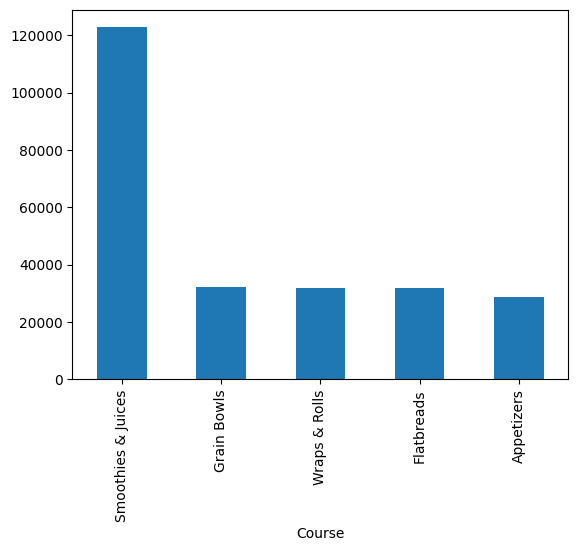

In [81]:
print(combined.Course.value_counts()[:5].index)
combined.Course.value_counts()[:5].plot(kind = "bar")
plt.show()

In [84]:
foods = ['Smoothies & Juices', 'Grain Bowls', 'Wraps & Rolls', 'Flatbreads',
       'Fresh Greens']

def khana_khazana(x):
    if x in foods:
        return("Top5_Foods")
    else:
        return("Other_Foods")

combined["Course_Cat"]= combined.Course.apply(khana_khazana)

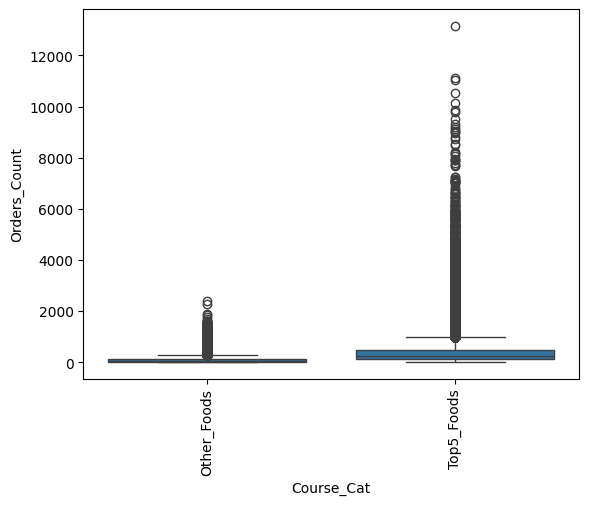

In [85]:
sns.boxplot(x="Course_Cat", y = "Orders_Count", data=combined)
plt.xticks(rotation = 90)
plt.show()

In [86]:
combined.head()

,Period_No,Facility_Category,Billing_Amount,Labelled_Price,Orders_Count,Course,Flavour_Profile,OC_FW,AOC_FW,MOC_FW,...,Magic6,Magic7,Magic8,Magic9,Magic10,Magic11,Magic12,area,Promotions,Course_Cat
0,1,c1,192.955562,267.971749,123.0,Finger Foods,Asian Fusion,4118,207.096163,134.0,...,289.687066,18103,313.646523,148.0,13.0,10544.0,473.337118,Others,0,Other_Foods
1,1,c3,193.384864,203.836706,55.0,Broths & Stews,Asian Fusion,4298,257.586087,109.0,...,464.342597,36987,222.396247,122.0,13.0,9532.0,329.431315,top5,0,Other_Foods
2,1,c3,384.988183,388.957411,204.0,Smoothies & Juices,Western,3635,160.554058,95.0,...,464.342597,6653,160.297760,94.0,13.0,4009.0,224.186851,Others,0,Top5_Foods
3,1,c3,255.251864,263.923874,257.0,Grain Bowls,South Asian,3261,200.477461,108.0,...,263.878412,7575,244.712739,149.0,13.0,4726.0,298.571900,Others,0,Top5_Foods
4,1,c3,319.949514,326.128813,14.0,Appetizers,Asian Fusion,3240,168.157716,95.0,...,263.878412,17767,184.067372,107.0,13.0,5334.0,252.308016,Others,0,Other_Foods


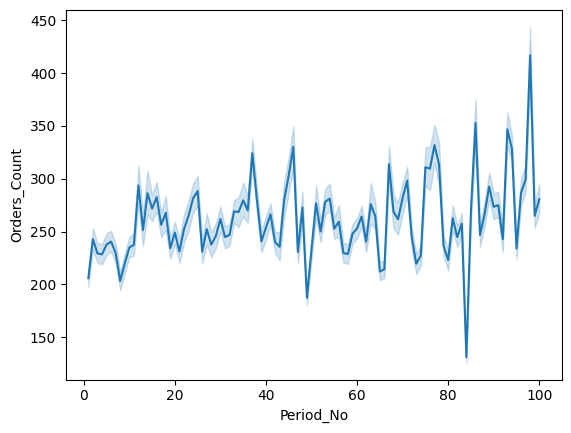

In [90]:
sns.lineplot(x = 'Period_No', y = 'Orders_Count', data = combined)
plt.show()

In [94]:
train.groupby("Period_No")["Orders_Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Period_No,,,,,,,,
1,3250.0,205.896000,253.210473,13.0,53.0,122.0,269.0,2822.0
2,3290.0,242.832219,289.594577,13.0,55.0,148.0,312.0,2715.0
3,3286.0,229.356665,277.997060,13.0,54.0,135.0,296.0,3172.0
4,3212.0,228.412827,277.741486,13.0,53.0,134.0,310.0,2848.0
5,3240.0,237.643210,294.750044,13.0,53.0,123.0,323.0,3012.0
...,...,...,...,...,...,...,...,...
96,3097.0,286.625767,372.542244,13.0,55.0,162.0,378.0,5576.0
97,3109.0,299.257639,377.704739,13.0,55.0,163.0,393.0,6576.0
98,3107.0,416.708722,768.388798,13.0,67.0,161.0,405.0,9532.0


In [95]:
test.Period_No.unique()

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140])

In [97]:
combined.drop(["Period_No", "Course"], axis = 1, inplace = True)

In [98]:
combined.head()

,Facility_Category,Billing_Amount,Labelled_Price,Orders_Count,Flavour_Profile,OC_FW,AOC_FW,MOC_FW,MinOC_FW,MaxAOC_FW,...,Magic6,Magic7,Magic8,Magic9,Magic10,Magic11,Magic12,area,Promotions,Course_Cat
0,c1,192.955562,267.971749,123.0,Asian Fusion,4118,207.096163,134.0,13.0,3374.0,...,289.687066,18103,313.646523,148.0,13.0,10544.0,473.337118,Others,0,Other_Foods
1,c3,193.384864,203.836706,55.0,Asian Fusion,4298,257.586087,109.0,13.0,7088.0,...,464.342597,36987,222.396247,122.0,13.0,9532.0,329.431315,top5,0,Other_Foods
2,c3,384.988183,388.957411,204.0,Western,3635,160.554058,95.0,13.0,2930.0,...,464.342597,6653,160.297760,94.0,13.0,4009.0,224.186851,Others,0,Top5_Foods
3,c3,255.251864,263.923874,257.0,South Asian,3261,200.477461,108.0,13.0,4726.0,...,263.878412,7575,244.712739,149.0,13.0,4726.0,298.571900,Others,0,Top5_Foods
4,c3,319.949514,326.128813,14.0,Asian Fusion,3240,168.157716,95.0,13.0,2741.0,...,263.878412,17767,184.067372,107.0,13.0,5334.0,252.308016,Others,0,Other_Foods


In [99]:
#cat_cols=['Facility_Category', "Flavour_Profile", "area", "Course_Cat", "Promotions"]

import statsmodels.formula.api as sfa

from statsmodels.stats.anova import anova_lm

model = sfa.ols("Orders_Count~Facility_Category+Flavour_Profile+area+Course_Cat+Promotions",
        data = combined).fit()

print(anova_lm(model))

                         df        sum_sq       mean_sq             F  \
Facility_Category       2.0  3.853415e+08  1.926708e+08   1845.979470   
Flavour_Profile         3.0  1.870291e+09  6.234304e+08   5973.090193   
area                    1.0  4.734250e+07  4.734250e+07    453.588769   
Course_Cat              1.0  6.080935e+09  6.080935e+09  58261.464850   
Promotions              1.0  5.412289e+09  5.412289e+09  51855.170561   
Residual           321428.0  3.354846e+10  1.043732e+05           NaN   

                          PR(>F)  
Facility_Category   0.000000e+00  
Flavour_Profile     0.000000e+00  
area               1.402311e-100  
Course_Cat          0.000000e+00  
Promotions          0.000000e+00  
Residual                     NaN  


In [101]:
combined.select_dtypes(include = np.number).columns

Index(['Billing_Amount', 'Labelled_Price', 'Orders_Count', 'OC_FW', 'AOC_FW',
       'MOC_FW', 'MinOC_FW', 'MaxAOC_FW', 'SDAOC_FW', 'Magic1', 'Magic2',
       'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7', 'Magic8', 'Magic9',
       'Magic10', 'Magic11', 'Magic12', 'Promotions'],
      dtype='object')

In [102]:
# Split the Data into train and test

newtrain = combined.loc[0:train.shape[0]-1, :]
newtest= combined.loc[train.shape[0]:, :]

train.shape, test.shape, newtrain.shape, newtest.shape

((321437, 13), (118070, 12), (321437, 26), (118070, 26))

In [103]:
nums = ['Billing_Amount', 'Labelled_Price', 'OC_FW', 'AOC_FW',
       'MOC_FW', 'MinOC_FW', 'MaxAOC_FW', 'SDAOC_FW', 'Magic1', 'Magic2',
       'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7', 'Magic8', 'Magic9',
       'Magic10', 'Magic11', 'Magic12']

pvalue = []

for i in nums:
    test, pvals = stats.ttest_ind(newtrain.loc[:, i], newtrain.Orders_Count)
    pvalue.append(pvals)

In [104]:
pd.DataFrame(pvals, columns = ["PValue"], index = nums).sort_values(by="PValue", ascending = False)

,PValue
Billing_Amount,0.0
Labelled_Price,0.0
OC_FW,0.0
AOC_FW,0.0
MOC_FW,0.0
MinOC_FW,0.0
MaxAOC_FW,0.0
SDAOC_FW,0.0
Magic1,0.0
Magic2,0.0


## Machine Learning

In [106]:
newtest.drop("Orders_Count", axis = 1, inplace = True)

In [108]:
from sklearn.ensemble import RandomForestRegressor

X = newtrain.drop('Orders_Count', axis =1)
y = newtrain.Orders_Count

In [109]:
rf = RandomForestRegressor()

dummytrain = pd.get_dummies(X,drop_first = True)
dummytest = pd.get_dummies(newtest,drop_first = True)

pred_rf = rf.fit(dummytrain, y).predict(dummytest)

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor()

pred_gbm = gbm.fit(dummytrain, y).predict(dummytest)

In [112]:
submission = pd.DataFrame({"Orders_Count":pred_rf})
submission.to_csv("RFModel.csv", index = False)

submission2 = pd.DataFrame({"Orders_Count":pred_gbm})
submission2.to_csv("GBMModel.csv", index = False)

In [ ]:
su